DBSCAN--> Density based spatial clustering of applications with noise

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [50]:
from sklearn.datasets import make_blobs

In [51]:
X,etiquetas=make_blobs(n_samples=5000, centers=[(24,30),(52,35),(36,50)],cluster_std=5,random_state=42)

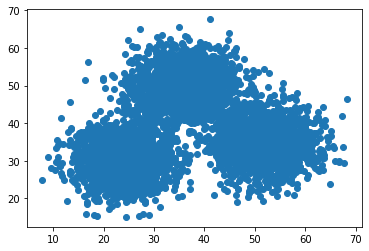

In [52]:
plt.scatter(X[:,0],X[:,1])

In [53]:
kmedias=KMeans(n_clusters=3)
etiquetas_pred=kmedias.fit_predict(X)

In [54]:
etiquetas_pred

array([2, 1, 0, ..., 0, 0, 0])

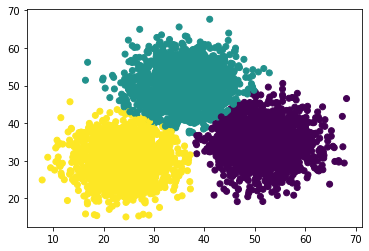

In [55]:
plt.scatter(X[:,0],X[:,1],c=etiquetas_pred)

In [56]:
pd.crosstab(etiquetas_pred,etiquetas)

col_0,0,1,2
row_0,,,
0,2,1646,31
1,18,21,1626
2,1647,0,9


### Indice de Jacard

$\cfrac{\#(A \cap B)}{\#(A \cup B)}$

In [57]:
def jacard(A,B):
    interseccion=[]
    for i in A:
        if i in B:
            interseccion.append(i)
    
    return len(interseccion)/(len(A)+len(B)-len(interseccion))


$P(A \cup B) = P(A)+ P(B) - P(A \cap B)$

In [58]:
jacard(X[etiquetas==0],X[etiquetas_pred==0])

0.0005980861244019139

In [59]:
jacard(X[etiquetas==0],X[etiquetas_pred==1])

0.005431502715751358

In [60]:
jacard(X[etiquetas==0],X[etiquetas_pred==2])

0.9826968973747017

In [61]:
from itertools import product

In [62]:
list(product([1,2],[3,4]))

[(1, 3), (1, 4), (2, 3), (2, 4)]

In [63]:
np.unique(etiquetas)

array([0, 1, 2])

In [64]:
def emparejamientos_funcion(X,etiquetas,etiquetas_pred):
    emparejamientos={}
    for cluster_real in np.unique(etiquetas_pred):
        valor=0
        for cluster_pred in np.unique(etiquetas):
            valor_jacard=jacard(X[etiquetas==cluster_real],X[etiquetas_pred==cluster_pred])
            if valor_jacard>valor:
                valor=valor_jacard
                emparejamientos[cluster_real]=cluster_pred

    return emparejamientos

In [65]:
emparejamientos_funcion(X,etiquetas,etiquetas_pred)

{0: 2, 1: 0, 2: 1}

In [66]:
dbscan=DBSCAN(eps=10)

In [67]:
dbscan.fit(X)

DBSCAN(eps=10)

In [68]:
predicc=dbscan.fit_predict(X)

In [70]:
set(predicc)

{0}

In [74]:
dbscan=DBSCAN(eps=1,min_samples=10)

In [75]:
predicc=dbscan.fit(X).labels_

In [76]:
set(predicc)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [77]:
from sklearn.datasets import make_circles

In [79]:
X,clasese_reales=make_circles(n_samples=5000,factor=0.3,noise=0.05)

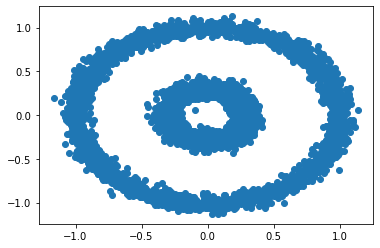

In [80]:
plt.scatter(X[:,0],X[:,1])

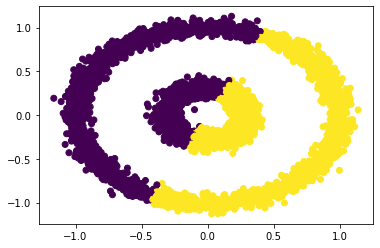

In [81]:
kmedias=KMeans(n_clusters=2)
etiquetas_kmedias=kmedias.fit(X).labels_
plt.scatter(X[:,0],X[:,1],c=etiquetas_kmedias)

In [84]:
dbscan=DBSCAN(eps=.05)
etiquetas_dbscan=dbscan.fit(X).labels_

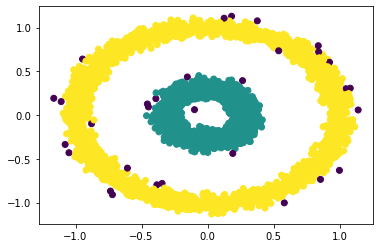

In [85]:
plt.scatter(X[:,0],X[:,1],c=etiquetas_dbscan)